In [34]:

%reset

In [35]:
import numpy as np
import tensorflow as tf
import importlib
import end_to_end_model
importlib.reload(end_to_end_model)
import sionna as sn
from sionna.phy.mapping import Constellation
from sionna.phy import config, dtypes, Block
from end_to_end_model import EndToEndSystem_bitwise_PAS, normalize_constellation, plot_constellation_wlabels, symbol_points_qam64

In [36]:
devices = tf.config.list_physical_devices('GPU')
print(len(devices))

1


In [37]:
batch_size = 1000
N = 64
num_bits_symbol = np.log2(N)
constellation_orig = Constellation("pam", num_bits_per_symbol=6)
tau = 10
parity_k = 2
ebno_db = tf.random.uniform(shape=[batch_size], minval=4.0, maxval=8.0)
No = sn.phy.utils.ebnodb2no(ebno_db, num_bits_per_symbol=num_bits_symbol, coderate=3/5)
No = tf.expand_dims(No, axis=-1)
device = "/GPU:0" if tf.config.list_physical_devices('GPU') else "/CPU:0"

use_upsampling_filtering_flag = False
use_uniform_flag = False

train = True # Change to train your own model
if train :
    # Number of iterations used for training
    NUM_TRAINING_ITERATIONS = 1000 # 1000 is good value for convergence

    # Instantiating the end-to-end model for training
    # model = EndToEndSystem_bitwise_P0_fixed(N, constellation, snr_db, batch_size, device, tau)
    model = EndToEndSystem_bitwise_PAS(N, parity_k, symbol_points_qam64, device, constellation_orig,use_upsampling_filtering_flag,use_uniform_flag,tau)

    # Adam optimizer (SGD variant)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    # optimizer.lr.assign(0.001)

    # Training loop
    for i in range(NUM_TRAINING_ITERATIONS):

        # Forward pass
        with tf.GradientTape() as tape:
            loss, loss_ordinary, entropy_value,_,_,_  = model(ebno_db, No)
        # Computing and applying gradients
        weights = model.trainable_weights
        grads = tape.gradient(loss, weights)
        optimizer.apply_gradients(zip(grads, weights))
        # Print progress
        if i % 50 == 0:
          tf.print('Iteration',i,'loss', loss.numpy() / np.log(2), 'loss_ordinary', loss_ordinary.numpy() / np.log(2), 'entropy_value', entropy_value.numpy() / np.log(2))


device /GPU:0
Iteration 0 loss -3.4410261267406614 loss_ordinary 2.3080802672055087 entropy_value 5.7491065659288205


/home/harindu/anaconda3/envs/myenvtf/lib/python3.10/site-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'end_to_end_system_bitwise_pas_8', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


Iteration 50 loss -3.8531392099053647 loss_ordinary 1.5136770964142687 entropy_value 5.366816306319634
Iteration 100 loss -3.8609657963808295 loss_ordinary 1.5108847860948602 entropy_value 5.37185058247569
Iteration 150 loss -3.8768986131220617 loss_ordinary 1.4789286897380418 entropy_value 5.355827302860104
Iteration 200 loss -3.8730947008502783 loss_ordinary 1.4676915153133165 entropy_value 5.340786044180944
Iteration 250 loss -3.8718536740416525 loss_ordinary 1.4632428400834483 entropy_value 5.335096514125101
Iteration 300 loss -3.88461616259688 loss_ordinary 1.4393714761610397 entropy_value 5.323987466775268
Iteration 350 loss -3.8731081154970455 loss_ordinary 1.449605647765933 entropy_value 5.322713763262978
Iteration 400 loss -3.875771438828307 loss_ordinary 1.4398915516972488 entropy_value 5.315662818542905
Iteration 450 loss -3.8663794662646893 loss_ordinary 1.4292756645987656 entropy_value 5.295655044872129
Iteration 500 loss -3.8779219098946958 loss_ordinary 1.420088093415698

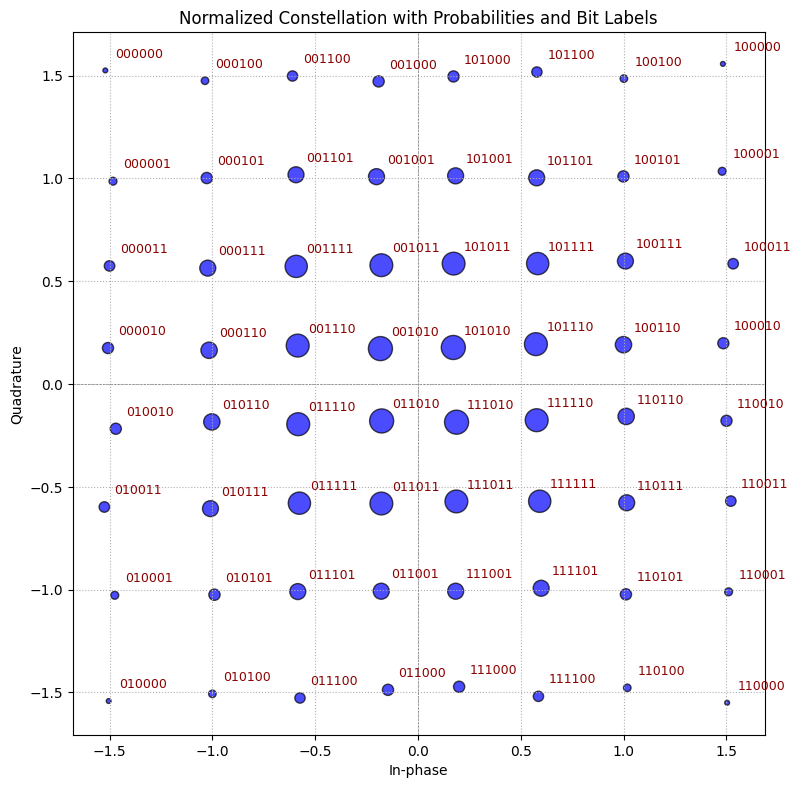

3.601226007938247
5.601226007938247
[0.00597919 0.01607359 0.03183481 0.02830816 0.0145854  0.03249363
 0.0687947  0.06553419 0.03214245 0.06608757 0.14889397 0.13372047
 0.0272363  0.06579434 0.13512608 0.12739512]
[-1.5204382 +1.5250883j  -1.4831252 +0.9862407j  -1.507422  +0.17481263j
 -1.4999517 +0.5742616j  -1.0356071 +1.4749054j  -1.026953  +1.0017698j
 -1.0156689 +0.16388215j -1.0221545 +0.563452j   -0.19102971+1.4715879j
 -0.2014793 +1.0083722j  -0.18233052+0.17206356j -0.17776497+0.57770896j
 -0.6099099 +1.4979827j  -0.59299076+1.0176632j  -0.58466804+0.18676637j
 -0.59187794+0.5719433j  -1.5040754 -1.5421182j  -1.4745414 -1.0279284j
 -1.4694897 -0.21774481j -1.525176  -0.59835434j -0.9996944 -1.5073134j
 -0.98950964-1.0250144j  -1.0023483 -0.18446578j -1.0089861 -0.60635924j
 -0.14553267-1.4877377j  -0.17840333-1.008013j   -0.17641447-0.17978673j
 -0.17773576-0.58144677j -0.5735588 -1.5274599j  -0.58427286-1.009826j
 -0.5821722 -0.19565623j -0.5764179 -0.57981044j  1.483462  

<Figure size 640x480 with 0 Axes>

In [38]:
ebno_db = tf.random.uniform(shape=[1], minval=7.8, maxval=8.0)

# ebno_db = tf.convert_to_tensor([5.0])

No = sn.phy.utils.ebnodb2no(ebno_db, num_bits_per_symbol=3.6, coderate=1)
No = tf.expand_dims(No, axis=-1)

with tf.GradientTape(persistent=False) as tape:
#     tape.watch(model.trainable_variables)  # Ensure variables are watched if needed, but no gradients will be calculated
    _,_,_,shaping_probs, norm_C_points, shaping_probs_basic = model(ebno_db, No)


# Define constellation points (complex numbers)
points = norm_C_points.numpy().flatten()
# points = x_mod.numpy().flatten()

# Define probabilities for each point
probabilities = shaping_probs.numpy().flatten()
basic_probabilities = shaping_probs_basic.numpy().flatten()

title = "Normalized Constellation with Probabilities and Bit Labels"
    # plt.savefig('const.pdf')

# Normalize the constellation
normalized_points = normalize_constellation(points, probabilities)

# Plot the constellation
plot_constellation_wlabels(normalized_points, probabilities,title)
def entropy(pdf, base=2):
    pdf = np.asarray(pdf, dtype=np.float64)
    pdf = pdf[pdf > 0]  # remove zero entries to avoid log(0)
    pdf /= np.sum(pdf)  # normalize to ensure valid probability distribution

    H = -np.sum(pdf * np.log(pdf) / np.log(base))
    return H

print(entropy(basic_probabilities))
print(entropy(probabilities))

print(basic_probabilities)
print(normalized_points)
# print(model.sampling.P0.numpy())

## For Testing

In [92]:
import sionna as sn
N = 16  # Number of classes (symbols)
# tf.compat.v1.enable_eager_execution()
# Generate phase angles equally spaced between 0 and 2pi
# angles = np.linspace(0, 2 * np.pi, int(N/2), endpoint=False)
# constellation1 = np.random.permutation(0.5*np.exp(1j * angles))
# constellation2 = np.random.permutation(1.2*np.exp(1j * angles))
# # Convert the angles to complex symbols on the unit circle
# constellation = np.concatenate((constellation1, constellation2), axis=0)

# snr_db = 12  # SNR in dB
# No = 1/(10**(snr_db/10))
tau = 10

# Batch size
batch_size = 2

parity_k =2

ebno_db = tf.random.uniform(shape=[batch_size], minval=5.0, maxval=5.0)

No = sn.phy.utils.ebnodb2no(ebno_db, num_bits_per_symbol=4, coderate=3/5)
No = tf.expand_dims(No, axis=-1)

# print(No.shape)

device = "/GPU:0" if tf.config.list_physical_devices('GPU') else "/CPU:0"
# device = "/CPU:0"

# tf_const_points = tf.reshape(tf.cast(constellation, dtype=tf.complex64), (1, 1, 32))
# print(tf_const_points)

constellation_orig = Constellation("pam", num_bits_per_symbol=4)
# Instantiating the end-to-end model for training
model = EndToEndSystem_bitwise_PAS(N, parity_k, qam_16, device, constellation_orig, tau)

loss, loss_ordinary, entropy_value,shaping_probs, norm_C_points = model(ebno_db, No)
print(loss_ordinary)
# print(shaping_probs)
# print(norm_C_points)

device /GPU:0
tf.Tensor(0.5802799, shape=(), dtype=float32)


In [35]:
import numpy as np
import tensorflow as tf
value_array = np.linspace(1, 32, 32)

In [36]:
print(value_array)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32.]


In [43]:
C_real = tf.convert_to_tensor(value_array, dtype=tf.float32)
C_imag = tf.convert_to_tensor(value_array, dtype=tf.float32)

C_points = tf.expand_dims(tf.complex(C_real, C_imag),0)
print(C_points.shape)

(1, 32)


In [44]:
symbol_prob_basic = tf.convert_to_tensor([[0.025, 0.225, 0.125, 0.025, 0.025, 0.325, 0.125, 0.125]])

In [45]:
print(tf.math.reduce_sum(symbol_prob_basic))
print(symbol_prob_basic.shape)

tf.Tensor(1.0, shape=(), dtype=float32)
(1, 8)


In [46]:
symbol_prob = tf.tile(symbol_prob_basic,(1,4))

normalization_constants = tf.sqrt(
    tf.reduce_sum(tf.reshape(symbol_prob * tf.abs(C_points) ** 2,(-1,4,8)), 2)
)

In [47]:
normalization_constants = tf.expand_dims(normalization_constants, axis=2)

normalization_constants = tf.complex(tf.reshape(tf.tile(normalization_constants,(1,1,8)),(-1,32)),0.0)

In [48]:
norm_C_points = C_points / normalization_constants

sampled_indices = np.arange(0, 32)
one_hot_samples = np.tile(np.eye(32)[sampled_indices], (2, 1, 1))
onehot_hard_sample = tf.convert_to_tensor(one_hot_samples, dtype=tf.float32)

In [34]:
%reset

In [60]:
print(tf.math.reduce_sum(symbol_prob_basic*tf.abs(norm_C_points[0,24:32])**2))

tf.Tensor(0.99999994, shape=(), dtype=float32)


In [61]:
print(tf.math.reduce_sum(symbol_prob))

tf.Tensor(4.0, shape=(), dtype=float32)
